In [127]:
import sys

import tensorflow.keras
# import pandas as pd
# import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
# print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.8.0
Keras Version: 2.8.0

Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
GPU is available


In [128]:
from keras.datasets import mnist

In [129]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [131]:
print('Original train data shape: ', train_data.shape)
train_data = train_data.reshape((60000, 28*28))
print('Reshaped train data: ', train_data.shape)
train_data = train_data.astype('float32')/255
print('Further reshaped train data: ', train_data.shape)

Original train data shape:  (60000, 28, 28)
Reshaped train data:  (60000, 784)
Further reshaped train data:  (60000, 784)


In [132]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [133]:
from keras import layers, models

model_0 = models.Sequential()
model_0.add(layers.Dense(512, activation='relu', input_shape=(train_data[0].shape)))
model_0.add(layers.Dense(10, activation='softmax'))

model_0.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
partial_train_data = train_data[50000:]
train_val_data = train_data[:10000]

partial_train_labels = train_labels[50000:]
train_val_labels = train_labels[:10000]

In [135]:
history = model_0.fit(partial_train_data, partial_train_labels, epochs=17, batch_size=512, verbose=0, validation_data=(train_val_data, train_val_labels))

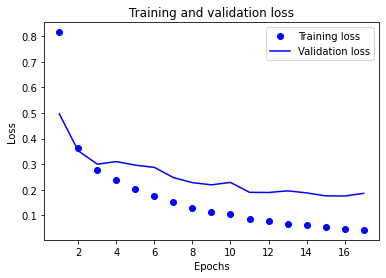

In [136]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

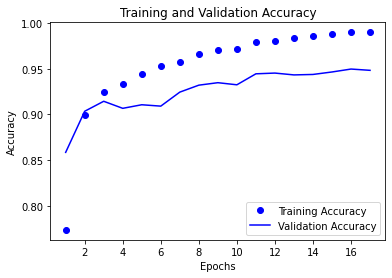

In [137]:
plt.clf()

history_dict = history.history

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [138]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = network.fit(partial_train_data, partial_train_labels, epochs=5, batch_size=128, validation_data=(train_val_data, train_val_labels))

Epoch 1/5
79/79 [==============================] - 1s 5ms/step - loss: 0.4947 - accuracy: 0.8599 - val_loss: 0.3647 - val_accuracy: 0.8915
Epoch 2/5
79/79 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9316 - val_loss: 0.2629 - val_accuracy: 0.9234
Epoch 3/5
79/79 [==============================] - 0s 5ms/step - loss: 0.1673 - accuracy: 0.9518 - val_loss: 0.2387 - val_accuracy: 0.9276
Epoch 4/5
79/79 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 0.9641 - val_loss: 0.1956 - val_accuracy: 0.9417
Epoch 5/5
79/79 [==============================] - 0s 4ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.2265 - val_accuracy: 0.9315


In [139]:
for x in history.history:
    print(x)

loss
accuracy
val_loss
val_accuracy


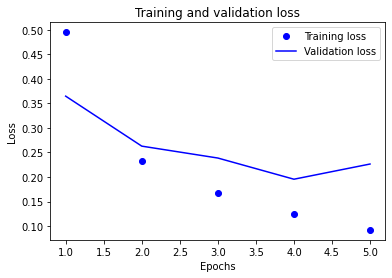

In [140]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

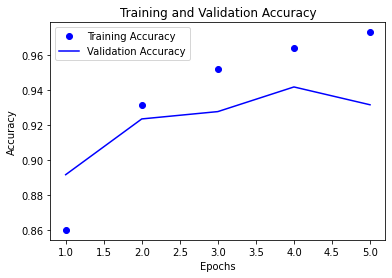

In [141]:
plt.clf()

history_dict = history.history

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [142]:
test_data.shape

(10000, 28, 28)

In [143]:
test_data = test_data.reshape((10000, 28*28))
test_data = test_data.astype('float32')/255


print(model_0.evaluate(test_data, test_labels))
print(network.evaluate(test_data, test_labels))

313/313 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9460
[0.1880030333995819, 0.9459999799728394]
313/313 [==============================] - 1s 2ms/step - loss: 0.2175 - accuracy: 0.9325
[0.21750673651695251, 0.9325000047683716]


In [144]:
model_0.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.9460


[0.1880030333995819, 0.9459999799728394]